<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

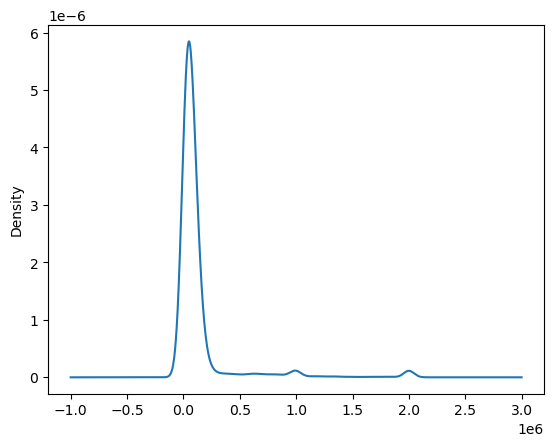

In [3]:
# your code goes here
df['ConvertedComp'].plot(kind='kde')

In [84]:
df.Age.median()

29.0

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:>

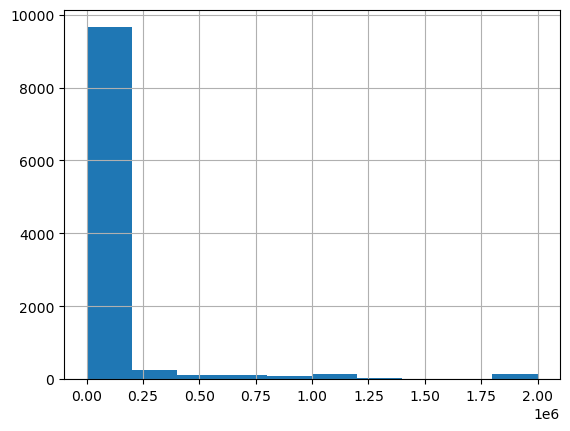

In [4]:
# your code goes here
df['ConvertedComp'].hist()

What is the median of the column `ConvertedComp`?


In [95]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [96]:
# your code goes here
# your code goes here
#m1
as_man = df['Gender']=='Man'
print("the number of men are :",as_man.sum())
#m2
print("------------------------------")
as_a_man = df['Gender'].value_counts()
as_a_man.head(1)

the number of men are : 10480
------------------------------


Man    10480
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [101]:
# your code goes here
median = df[['ConvertedComp','Gender']]
median = median.groupby('Gender').median()

median = df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()
median

,ConvertedComp
Gender,
Man,57744.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",67142.0
Woman,57708.0
Woman;Man,21648.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [45]:
# your code goes here
df.ConvertedComp.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:>

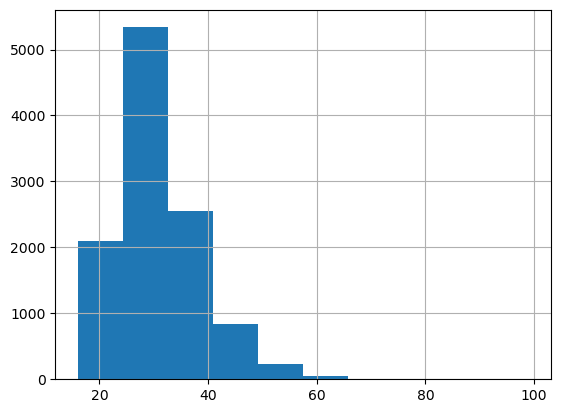

In [89]:
# your code goes here
df.Age.hist()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

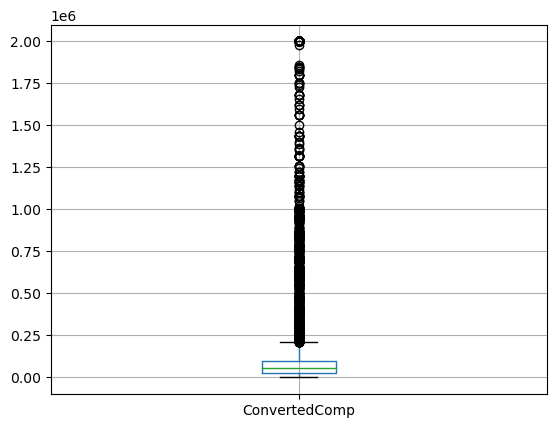

In [75]:
# your code goes here
df.boxplot(column=['ConvertedComp'])

<AxesSubplot:>

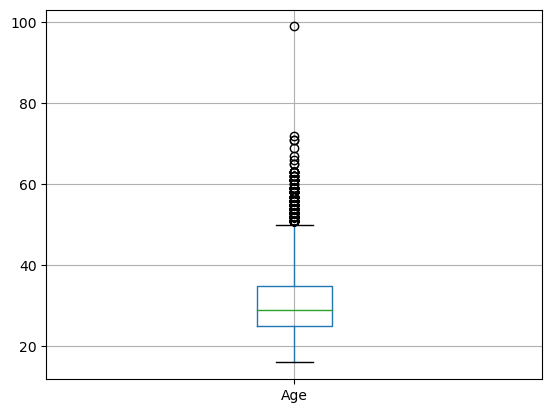

In [91]:
df.boxplot(column='Age')

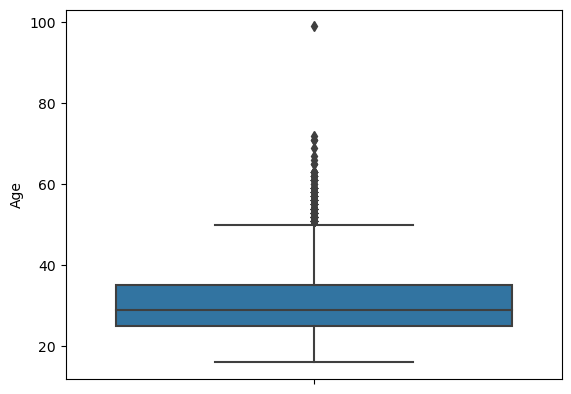

In [92]:
sns.boxplot( y=df["Age"] );
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [50]:
# your code goes here
q_1 = df.ConvertedComp.quantile(0.25)
q_3 = df.ConvertedComp.quantile(0.75)
IQR = q_3 - q_1
print('Inter Quartile Range for the column ConvertedComp',IQR)

Inter Quartile Range for the column ConvertedComp 73132.0


Find out the upper and lower bounds.


In [66]:
# your code goes here
lower_b = q_1 - 1.5 * IQR
upper_b = q_3 + 1.5 * IQR
print('Lower Bound :' , lower_b)
print('Upper Bound :' , upper_b)

Lower Bound : -82830.0
Upper Bound : 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [76]:
# your code goes here
outliers = df[(df.ConvertedComp < lower_b)|(df.ConvertedComp > upper_b)]
outliers.ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [80]:
# your code goes here
no_outliers = df[(df.ConvertedComp > lower_b)&(df.ConvertedComp < upper_b)]
no_outliers.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [94]:
#after removing outliers
print(no_outliers['ConvertedComp'].median())
print(no_outliers['ConvertedComp'].mean())

52704.0
59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [83]:
# your code goes here
no_outliers.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
